## Data Science Intern - LetsGrowMore
## Author : Faisal Qureshi
## TASK 1 : Advanced LEVEL
## TASK 3: MNIST Hand Digits Written Classification Using CNN

## Importing Libraries

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Download Hand Written Data set From Keras Library
## Split Into Train And Test Data set

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

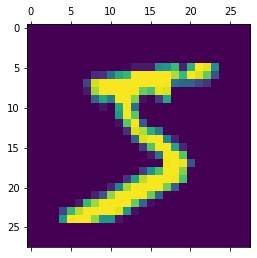

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

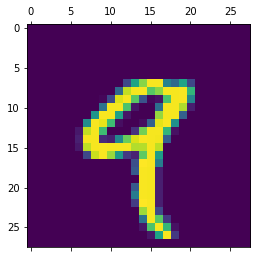

In [11]:
plt.matshow(X_train[4])

In [12]:
y_train[1]

0

In [13]:
X_train.shape

(60000, 28, 28)

## Create Model Layers Using Kears Library
## Compile Model
## Train Model Using Fit Method


In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.0767 - accuracy: 0.7977
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4202 - accuracy: 0.8939
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2378 - accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9394
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2122 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1906 - accuracy: 0.9494
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1924 - accuracy: 0.9509
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1764 - accuracy: 0.9542
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.177

## Evaulate Model 

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2770 - accuracy: 0.9469


[0.27700933814048767, 0.9469000101089478]

## Create Confusion Matrix

Text(69.0, 0.5, 'Truth')

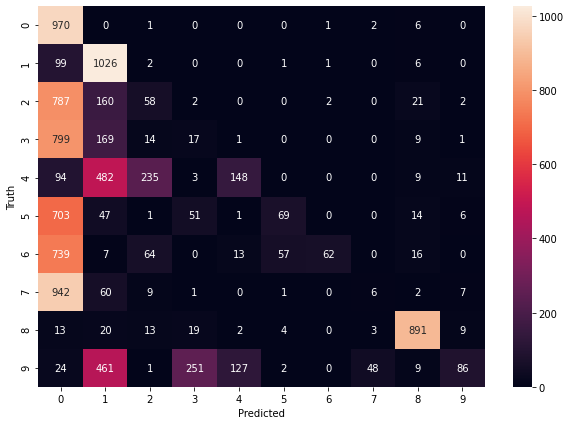

In [16]:
import seaborn as sns
y_predicted=model.predict(X_test)
y_predicted_label=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Conclusion:
#### We got a 93.6% Accuracy Using epochs 10